## Implementation Of Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Reading the Dataset

In [2]:
dataset=pd.read_csv('Social_Network_Ads.csv')

#### Extracting the dependent and the other variable from the Dataset

In [3]:
X=dataset.iloc[:,[2,3]].values
Y=dataset.iloc[:,4].values

#### splitting the training and test set

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

#### Scaling the database to remove dominance of any independent variable

In [8]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

#### fitting logistic Regression To the training set

In [10]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,Y_train)

LogisticRegression()

#### Predicting the Test set Results

In [13]:
Y_pred=classifier.predict(X_test)

#### Creating the Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)

In [15]:
cm

array([[50,  3],
       [ 7, 20]])

In [20]:
Efficiency= ((cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]))*100

#### Visualising the Training set result

In [21]:
Efficiency

87.5

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


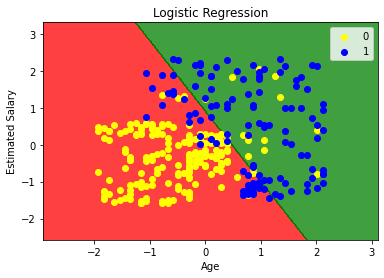

In [22]:
from matplotlib.colors import ListedColormap

X_set,Y_set=X_train,Y_train
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                  np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set==j,0],X_set[Y_set==j,1],
                c=ListedColormap(('yellow','blue'))(i),label=j)
plt.title('Logistic Regression')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()